# Unsupervised Learning - Clustering

We've shown several unsupervised learning algorithms in this unit,  We first introduced the simplest clustering algorihtm k-means.  Hierarchical clustering included agglomerative and divisive clustering algorithms. Finally we discussed a powerful density-based algorihtm DBSCAN that performs fairly well when the clusters have irregular shapes, In this coding assignment you will explore more clustering algorithms and become familiar with the sklearn's clustering package. You'll also need to tune the hyper parameters of these models and get a sense about how the hyperparameters influence the shape of resulting clusters. 



## Loading the Dataset

Load dataset with different cluster shapes and try algorithms on them.

In [5]:
from sklearn.datasets import make_blobs, make_moons, make_circles, make_swiss_roll
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import time
import warnings

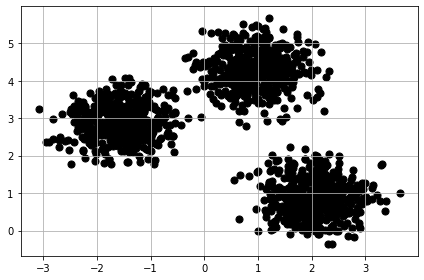

array([[-1.24617906,  2.28808418],
       [ 0.72359092,  3.89589156],
       [ 0.91718806,  3.96369823],
       ...,
       [ 0.9469768 ,  4.14501578],
       [ 1.08906091,  4.99835999],
       [-1.01579884,  2.70916753]])

In [6]:
n_samples = 1500
X_blobs, y_blobs = make_blobs(n_samples= n_samples, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c='black', marker='o', s=50)
plt.grid()
plt.tight_layout()
plt.show()
X_blobs

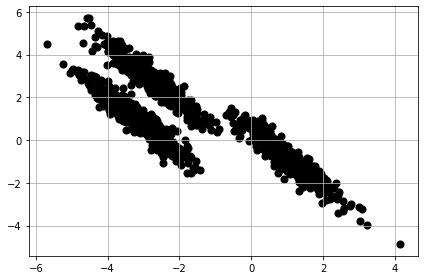

In [3]:
random_state = 170
X_blobs1, y_blobs1 = make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X_blobs1, transformation)
aniso = (X_aniso, y_blobs1)
plt.scatter(aniso[0][:, 0], aniso[0][:, 1], c='black', marker='o', s=50)
plt.grid()
plt.tight_layout()
plt.show()

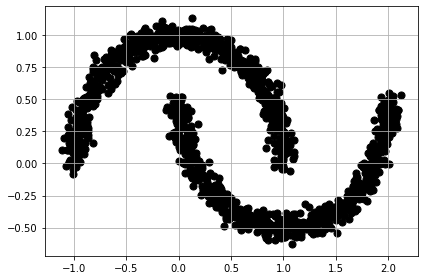

In [4]:
noisy_moons = make_moons(n_samples=n_samples, noise=.05)
plt.scatter(noisy_moons[0][:, 0], noisy_moons[0][:, 1], c='black', marker='o', s=50)
plt.grid()
plt.tight_layout()
plt.show()

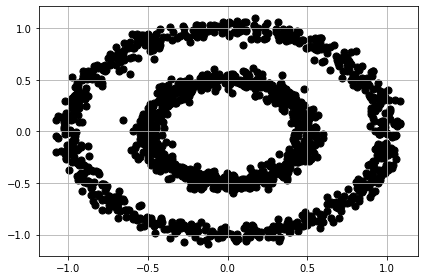

In [5]:
noisy_circles = make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
plt.scatter(noisy_circles[0][:, 0], noisy_circles[0][:, 1], c='black', marker='o', s=50)
plt.grid()
plt.tight_layout()
plt.show()

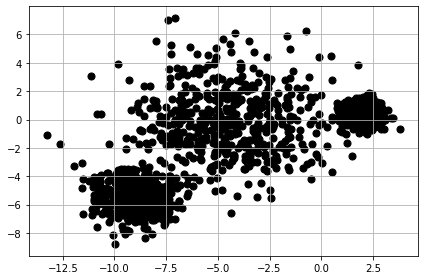

In [6]:
varied = make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)
plt.scatter(varied[0][:, 0], varied[0][:, 1], c='black', marker='o', s=50)
plt.grid()
plt.tight_layout()
plt.show()

## Grouping objects by similarity using k-means

K-means algorithm is simple but it performs poorly to enlongated clusters, or manifolds with irregular shapes.

In [7]:
def print_cluster(model, n_clusters, X):
    y_km = model.fit_predict(X)
    color_list = ['lightgreen', 'orange', 'lightblue', 'red', 'yellow', 'brown', 'cyan']
    for i in range(n_clusters):
        plt.scatter(X[y_km == i, 0],
        X[y_km == i, 1],
        s=50,
        c=color_list[i],
        marker='s',
        label='cluster ' + str(i))
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

In [8]:

km = KMeans(n_clusters=3, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

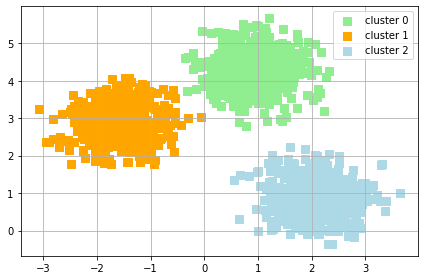

In [9]:
print_cluster(km, 3, X_blobs)

## Using the elbow method to find the optimal number of clusters

In [10]:
def plot_distortions(data):
    distortions = []
    for i in range(1, 11):
        km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
        km.fit(data)
        distortions.append(km.inertia_)
    plt.plot(range(1, 11), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.tight_layout()
    plt.show()

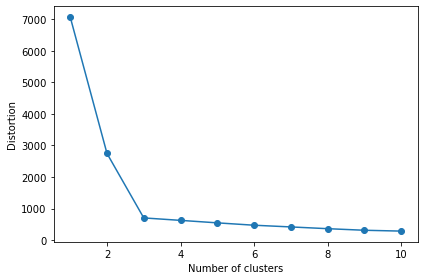

In [11]:
plot_distortions(X_blobs)

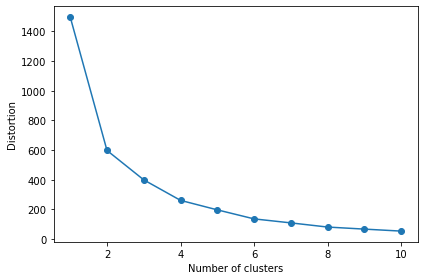

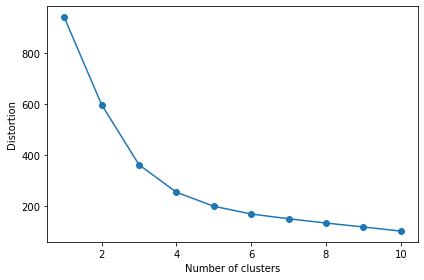

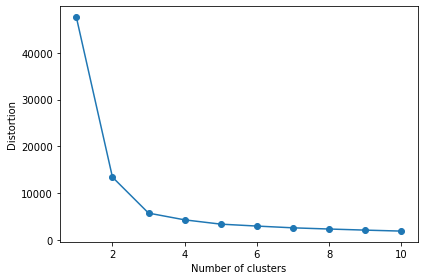

In [12]:
# TODO :: run the kmeans on the other datasets and use elbow method to select the number of clusters.
plot_distortions(noisy_moons[0]) # 4 clusters
plot_distortions(noisy_circles[0]) # 3 clusters
plot_distortions(varied[0]) # 3 clusters

## Hierarchical clustering

Hierarchical clustering is a general family of clustering algorithms that build nested clusters by merging or splitting them successively. This hierarchy of clusters is represented as a tree (or dendrogram). The root of the tree is the unique cluster that gathers all the samples, the leaves being the clusters with only one sample. 

## Agglomerative Clustering 

The algorithm performs a hierarchical clustering using a bottom up approach. Agglomerative cluster has a “rich get richer” behavior that leads to uneven cluster sizes. 

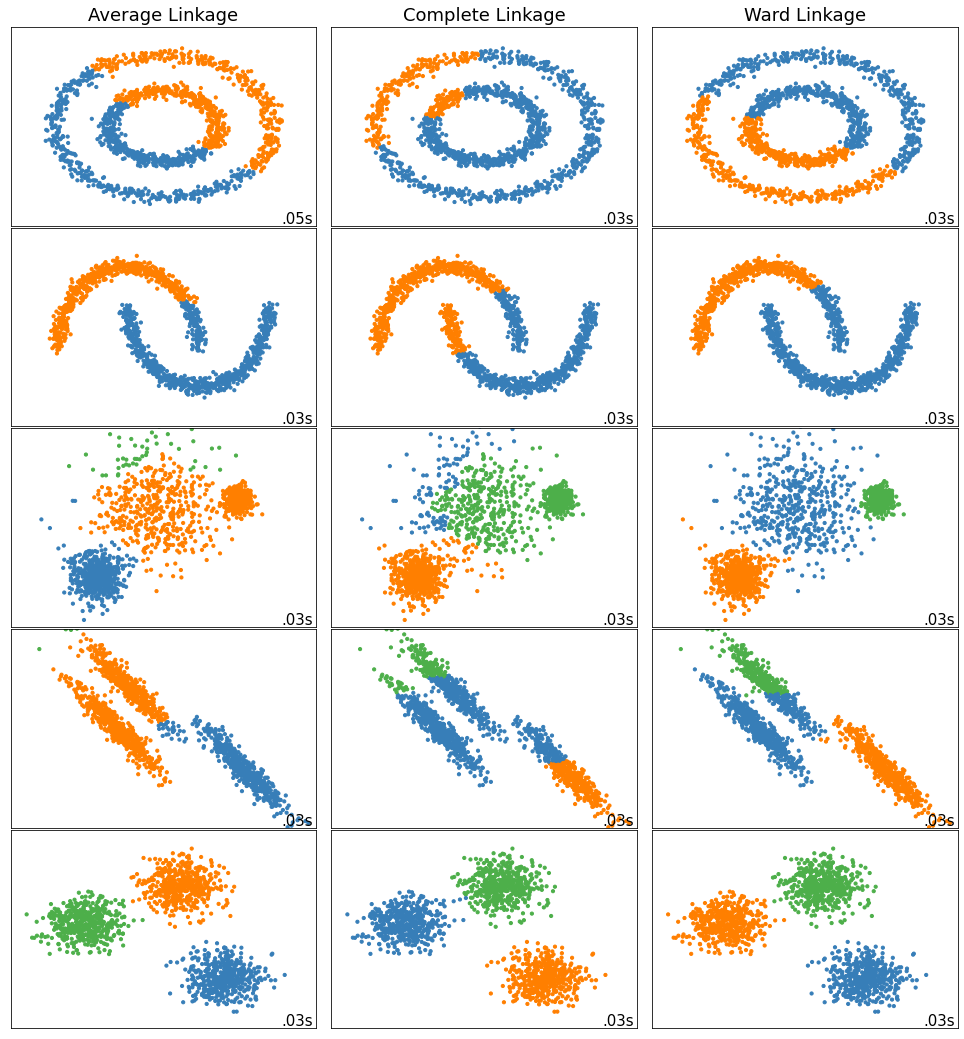

In [13]:
from itertools import cycle, islice

# Set up cluster parameters
plt.figure(figsize=(9 * 1.3 + 2, 14.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'n_neighbors': 10,
                'n_clusters': 3}

datasets = [
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (varied, {'n_neighbors': 2}),
    (aniso, {'n_neighbors': 2}),
    ((X_blobs, y_blobs), {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # ============
    # Create cluster objects
    # ============
    ward = AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward')
    complete = AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='complete')
    average = AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='average')
    
    clustering_algorithms = (
        ('Average Linkage', average),
        ('Complete Linkage', complete),
        ('Ward Linkage', ward),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

Compute structured hierarchical clustering...
Elapsed time: 0.01593303680419922
Compute structured hierarchical clustering...
Elapsed time: 0.04552197456359863


/Users/howard/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass noise=0.05 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


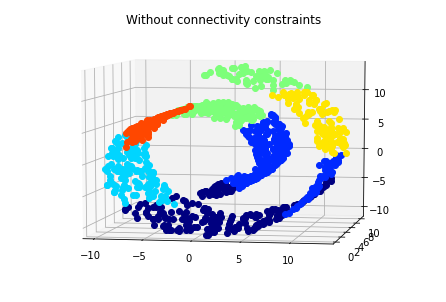

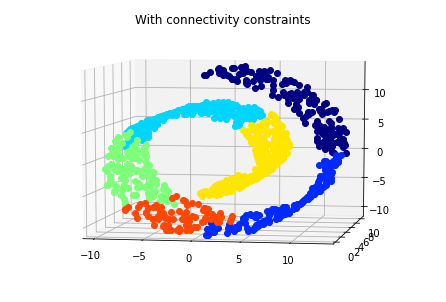

In [14]:
import time as time
import numpy as np
import pylab as pl
import mpl_toolkits.mplot3d.axes3d as p3

###############################################################################
# Generate data (swiss roll dataset)
n_samples = 1000
noise = 0.05
X, _ = make_swiss_roll(n_samples, noise)
# Make it thinner
X[:, 1] *= .5

###############################################################################
# Compute clustering
print("Compute structured hierarchical clustering...")
st = time.time()
ward = AgglomerativeClustering(
        n_clusters=6, linkage='ward')
ward.fit(X)
if hasattr(algorithm, 'labels_'):
    label = ward.labels_.astype(np.int)
else:
    label = ward.predict(X)
print ("Elapsed time: {}".format(time.time() - st))

###############################################################################
# Plot result
fig = pl.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
for l in np.unique(label):
    ax.plot3D(X[label == l, 0], X[label == l, 1], X[label == l, 2],
              'o', color=pl.cm.jet(np.float(l) / np.max(label + 1)))
pl.title('Without connectivity constraints')

###############################################################################
# Define the structure A of the data. Here a 10 nearest neighbors
from sklearn.neighbors import kneighbors_graph
connectivity = kneighbors_graph(X, n_neighbors=10)

###############################################################################
# Compute clustering
print("Compute structured hierarchical clustering...")
st = time.time()
ward = AgglomerativeClustering(
        n_clusters=6, linkage='ward', connectivity=connectivity)
ward.fit(X)
if hasattr(algorithm, 'labels_'):
    label = ward.labels_.astype(np.int)
else:
    label = ward.predict(X)
print ("Elapsed time: {}".format(time.time() - st))

###############################################################################
# Plot result
fig = pl.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
for l in np.unique(label):
    ax.plot3D(X[label == l, 0], X[label == l, 1], X[label == l, 2],
              'o', color=pl.cm.jet(float(l) / np.max(label + 1)))
pl.title('With connectivity constraints')

pl.show()

## Question 1

Based on the code above, what is the difference between the two models? Which one performs better and why?

The difference between the two models is that the first model had the same color on different parts of the strip and the second does not have that. The second one with connectivity constraints performs better since all points of the same cluster are close together when it is unrolled.


## DBSCAN algorithm

As opposed to k-means algorithm which assumes that clusters are convex shape, DBSCAN views clusters as areas of high density separated by areas of low density. 

Estimated number of clusters: 3
Estimated number of noise points: 38
Homogeneity: 0.976
Completeness: 0.902
V-measure: 0.937


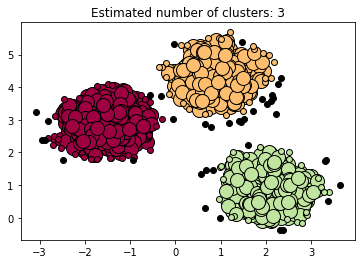

In [15]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X_blobs)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_blobs, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y_blobs, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y_blobs, labels))

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X_blobs[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X_blobs[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

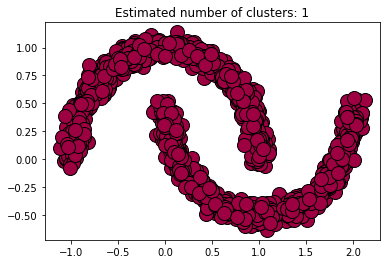

In [16]:
db = DBSCAN(eps=0.3, min_samples=5).fit(noisy_moons[0])
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = noisy_moons[0][class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = noisy_moons[0][class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

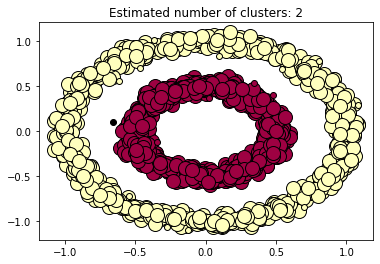

In [17]:
db = DBSCAN(eps=0.1, min_samples=7).fit(noisy_circles[0])
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = noisy_circles[0][class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = noisy_circles[0][class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

## Question 2

eps and min_samples are two important parameters for the DBSCAN model.  What are those two parameters? Tune the parameters of the model for noisy_circles and noisy_moon dataset to make it separate the clusters perfectly.

eps is the threshold distance where the two points are considered neighbors.
min_samples is minimum number of neighbors a given point should have in order to be classified as a core point.

for noisy_circles eps=0.2, min_samples=7 separates the clusters.
for noisy_moon eps=0.3, min_samples=5 separates the clusters.

## Mean-Shift Algorithm

Similiar to K-means, Mean shift algorithm locates the centroids of the clusters by shifting the points to density function maxima. Here is the procedure of the algorithm.


1. For each datapoint x ∈ X, find the neighbouring points N(x) of x.

2. For each datapoint x ∈ X, calculate the mean shift m(x).

3. For each datapoint x ∈ X, update x ← m(x).

4. Repeat 1. for n_iterations or until the points are almost not moving or not moving.

In [18]:
import math

def euclid_distance(x, xi):
    return np.sqrt(np.sum((x - xi)**2))

def neighbourhood_points(X, x_centroid, distance = 5):
    eligible_X = []
    for x in X:
        distance_between = euclid_distance(x, x_centroid)
        # print('Evaluating: [%s vs %s] yield dist=%.2f' % (x, x_centroid, distance_between))
        if distance_between <= distance:
            eligible_X.append(x)
    return eligible_X

def gaussian_kernel(distance, bandwidth):
    val = (1/(bandwidth*math.sqrt(2*math.pi))) * np.exp(-0.5*((distance / bandwidth))**2)
    return val

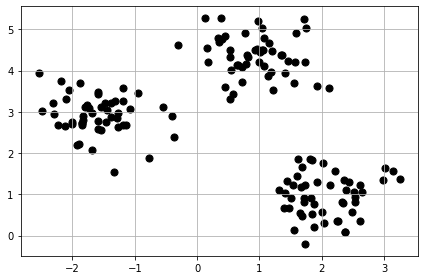

In [19]:
n_samples = 150
X_blobs, y_blobs = make_blobs(n_samples= n_samples, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c='black', marker='o', s=50)
plt.grid()
plt.tight_layout()
plt.show()

In [42]:
original_data = X_blobs
# freeze the original points and make a copy
copy_points = np.copy(original_data)

look_distance = 1  # How far to look for neighbours.
kernel_bandwidth = 5  # Kernel parameter.
# a list to save the history move to do the visualization
past_X = []
n_iteration = 3
for i in range(n_iteration):
    
    for index, x in enumerate(copy_points):
        
        # for each datapoint x, find the neighbouring points N(x) of x
        neighbors = neighbourhood_points(copy_points, x, look_distance)
        # calculate the mean shift m(x)
         
        denominator = 0
        nominator = 0
        for n in neighbors:
            weight = gaussian_kernel(euclid_distance(x, n), kernel_bandwidth)
            nominator += weight * n
            denominator += weight
        new_x = nominator/(denominator+1e-4)
        copy_points[index] = new_x
    past_X.append(np.copy(copy_points))
         
       

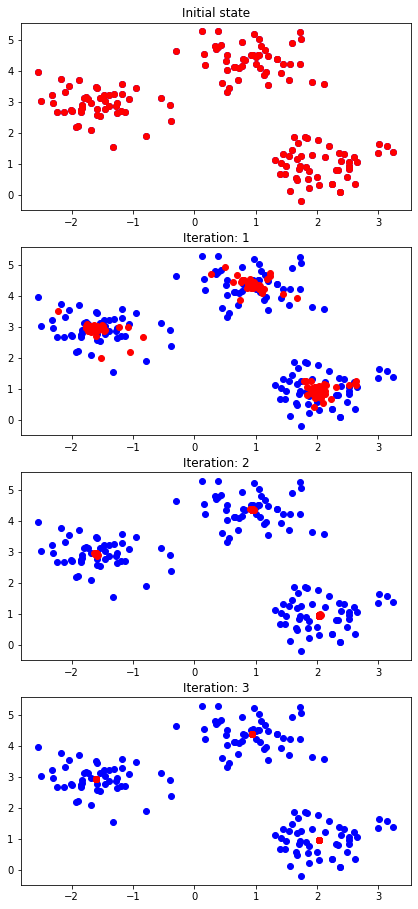

In [43]:
figure = plt.figure(1)
figure.set_size_inches((7, 20))
plt.subplot(n_iteration+2, 1, 1)
plt.title('Initial state')
plt.plot(original_data[:,0], original_data[:,1], 'bo')
plt.plot(original_data[:,0], original_data[:,1], 'ro')

for i in range(n_iteration):
    figure_index = i + 2
    plt.subplot(n_iteration+2, 1, figure_index)
    plt.title('Iteration: %d' % (figure_index - 1))
    plt.plot(original_data[:,0], original_data[:,1], 'bo')
    plt.plot(past_X[i][:,0], past_X[i][:,1], 'ro')
plt.show()

## Question 3

look_distance and kernel_bandwidth are two important parameters for mean shift algorithm. kernel_bandwidth simply determines the size of neighborhood over which the density will be computed. look_distance determines the region to look at when searching the surrounding neighbors. Tune these two parameters to make the cluster centroids exactly 3 for the above dataset. What is proper look_distance and kernel_bandwidth in your setting?

I tried various settings and look_distance = 2/kernel_bandwidth = 1 gives 3 centroids.
Also look_distance = 1/kernel_bandwidth = 5 gives 3 centroids

## Question 4

Apply any of these algorithms to your favorite dataset.  Possible applications of clustering algorihtm will include but not be limited to image segmentation and outlier detection.


In [50]:
import pandas as pd
data = pd.read_csv('clustering.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


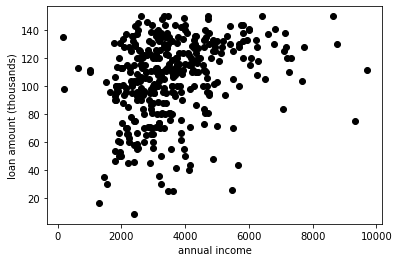

In [48]:
the_data = data[["LoanAmount","ApplicantIncome"]]

plt.scatter(the_data["ApplicantIncome"],the_data ["LoanAmount"],c='black')
plt.xlabel('annual income')
plt.ylabel('loan amount (thousands)')
plt.show()

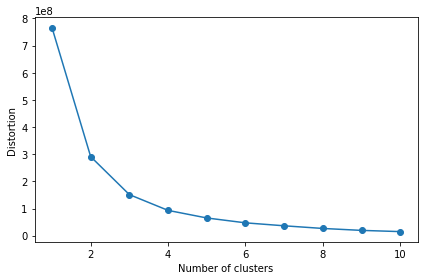

In [51]:
plot_distortions(the_data) # 

In [70]:
km2 = KMeans(n_clusters=3, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

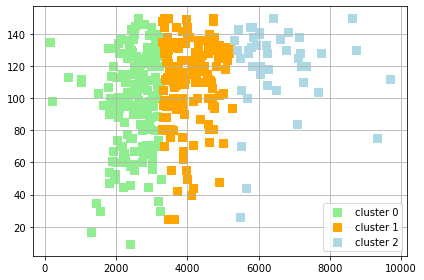

In [71]:
d1 = [coor[1] for coor in the_data.to_numpy()]
d2 = [coor[0] for coor in the_data.to_numpy()]
res = []
for i in range(len(the_data.to_numpy())):
       res.append([d1[i],d2[i]])        
res
print_cluster(km2, 3, np.array(res))